
# Exercice 9.2 from Practical astronomy

=======================================================================

- Sylvie Dagoret-Campagne
- affliliation : IJCLAB/IN2P3/CNRS
- creation date : May 10th 2020


https://www.astro.ubc.ca/people/jvw/ASTROSTATS/pracstats_web_ed1.html#chapter9


9.2 Variance of estimators for $w(\theta)$ (D). Generate 20,000 data points randomly in the region $0^o < \alpha < 5^o$, $0^o < \delta < 5^o$. Estimate $w(\theta)$ using the Natural estimator $w_1$, the Peebles estimator $w_2$, the Landy-Szalay estimator $w_3$ and the Hamilton estimator $w_4$. (Average $DR$ and $RR$ over say 10 comparison sets each of 20,000 random points). Plot the results as a function of $\delta$ showing Poisson error bars $1/\sqrt{DD}$. Comment on the results - which estimator is best?


- Natural estimator
$$
w_1 = \frac{r(r − 1)}{n(n − 1)}\frac{DD}{RR}− 1
$$

- Peebles estimator
$$
w_2 =\frac{2r}{(n − 1)}\frac{DD}{DR}− 1
$$

- Landy-Szalay estimator
$$
w_3 = \frac{r(r − 1)}{n(n − 1)}
\frac{DD}{RR}
− \frac{(r − 1)}{n}\frac{DR}{RR}+ 1
$$

- Hamilton estimator
$$
w_4 =
\frac{4nr}
{(n − 1)(r − 1)}
\frac{DD \times RR}
{(DR)^2}
− 1
$$

In [157]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [158]:
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import os
import numpy as np
from os import listdir
import re

In [159]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

In [160]:
matplotlib.rcParams.update({'font.size': 15, 'lines.linewidth': 2, 'lines.markersize': 15})
matplotlib.rcParams["axes.labelsize"]="small"
matplotlib.rcParams["axes.linewidth"]=2.0
matplotlib.rcParams["xtick.major.size"]=8
matplotlib.rcParams["ytick.major.size"]=8
matplotlib.rcParams["ytick.minor.size"]=5
matplotlib.rcParams["xtick.labelsize"]="large"
matplotlib.rcParams["ytick.labelsize"]="large"
matplotlib.rcParams["figure.figsize"]=(12,6)
matplotlib.rcParams['axes.titlesize'] = 15
matplotlib.rcParams['axes.titleweight'] = 'bold'
#matplotlib.rcParams['axes.facecolor'] = 'blue'
matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'
matplotlib.rcParams['lines.markeredgewidth'] = 0.3 # the line width around the marker symbol
matplotlib.rcParams['lines.markersize'] = 10  # markersize, in points
matplotlib.rcParams['grid.alpha'] = 1. # transparency, between 0.0 and 1.0
matplotlib.rcParams['grid.linestyle'] = '-' # simple line
matplotlib.rcParams['grid.linewidth'] = 0.4 # in points

In [161]:
from astropy import units as u
from astropy.coordinates import Angle

In [162]:
from astropy.table import Table

In [163]:
import pandas as pd

In [164]:
import time
from datetime import datetime,date
import dateutil.parser

In [165]:
today = date.today()
string_date=today.strftime("%Y-%m-%d")

# Configuration

## Data

In [166]:
file_data="Ex9_2_data.xlsx"

In [167]:
df=pd.read_excel(file_data,header=2)

In [168]:
df

,ra1,dec1,ra2,dec2,ra3,dec3,ra4,dec4,ra5,dec5
0,0.2481,1.6859,0.0882,4.6088,0.0513,2.3210,0.0286,4.3367,0.0608,1.9619
1,0.0240,2.9128,0.0316,1.8475,0.0816,0.4579,0.1422,1.8168,0.0631,2.7723
2,0.1356,2.2626,0.1471,3.9426,0.3307,1.7644,0.3245,3.8198,0.2750,3.4797
3,0.1168,3.8142,0.1651,2.3955,0.1391,1.0369,0.2946,0.9607,0.3214,3.9790
4,0.2379,0.8160,0.3231,2.2251,0.2087,4.9041,0.2938,3.1325,0.2186,2.0389
...,...,...,...,...,...,...,...,...,...,...
3995,0.2973,3.3146,0.3295,0.8261,0.1113,1.5342,0.0463,2.6163,0.2847,3.7272
3996,0.2506,2.0404,0.2046,2.8135,0.1178,1.5804,0.1541,0.9717,0.1751,1.4077
3997,0.1780,4.1677,0.0225,3.1819,0.1727,1.3299,0.0666,1.5551,0.2778,4.6340
3998,0.0988,0.2636,0.3246,0.8955,0.0550,1.7725,0.0874,4.6654,0.2728,4.0375


In [169]:
# right ascenssion in hours
df1=pd.concat([df["ra1"], df["ra2"],df["ra3"],df["ra4"],df["ra5"]],axis=0)

In [170]:
# declination in degrees
df2=pd.concat([df["dec1"], df["dec2"],df["dec3"],df["dec4"],df["dec5"]],axis=0)

In [171]:
# use Angle to convert into degrees
myra=Angle(df1.values,unit="hour")

In [172]:
myra.degree

array([3.7215, 0.36  , 2.034 , ..., 4.167 , 4.092 , 1.839 ])

In [173]:
df_data=pd.DataFrame()

In [174]:
df_data["ra"]=myra.degree  # convert right ascenssion into degrees
df_data["dec"]=df2.values  # keep declination into degrees

In [175]:
df3=df_data.iloc[0:5000]

In [176]:
Nobj=len(df3)
array_shape=df3.shape

<Figure size 720x720 with 0 Axes>

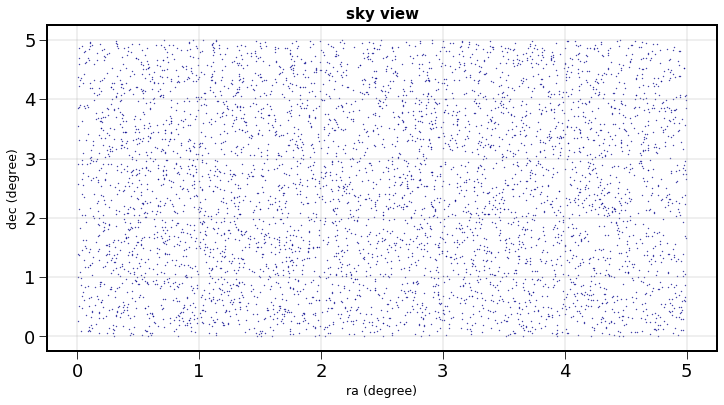

In [177]:
plt.figure(figsize=(10,10))
ax=df3.plot.scatter("ra","dec",marker='.',s=0.5,c='DarkBlue',title="sky view")
ax.set_xlabel("ra (degree)")
ax.set_ylabel("dec (degree)")
ax.grid()

# Generate random array

In [178]:
NBREAL=10
all_randomsky=[]
for ir in np.arange(NBREAL): 
    random_sky=np.random.uniform(0,5,array_shape)
    all_randomsky.append(random_sky)

In [179]:
df_n=pd.DataFrame()

In [180]:
df_n["ra"]=random_sky[:,0]
df_n["dec"]=random_sky[:,1]

# Correlation function

In [181]:
FLAG_FIGFILE=False

## correlation computation config

In [182]:
ra0=0
dec0=0

In [183]:
def distance(ra,dec):
    return np.sqrt((ra-ra0)**2+(dec-dec0)**2)

In [184]:
def dist_row(row):
    return distance(row["ra"],row["dec"])

In [185]:
df3.apply(dist_row, axis=1)

0       4.085563
1       2.934962
2       3.042452
3       4.197336
4       3.660608
          ...   
4995    2.370951
4996    3.137552
4997    4.366014
4998    2.898871
4999    5.257416
Length: 5000, dtype: float64

## Histogram config

In [186]:
THETAS=np.arange(0,10,0.05) 
NBINS=len(THETAS)-1
BINSIZE=(THETAS[-1]-THETAS[0])/NBINS

In [187]:
BINSTART=THETAS[0]
BINSTOP=THETAS[-1]+BINSIZE
NBINS+=1

## DD

In [188]:
df3

,ra,dec
0,3.7215,1.6859
1,0.3600,2.9128
2,2.0340,2.2626
3,1.7520,3.8142
4,3.5685,0.8160
...,...,...
4995,1.4550,1.8720
4996,0.8415,3.0226
4997,3.9870,1.7793
4998,0.8970,2.7566


In [ ]:
# loop on each element in the original dataframe
df0=df3.copy()

df0.reset_index()
df_data.reset_index()

for index, row in df3.iterrows():
    
    
    # isolate the current element
    ra0 = row['ra']
    dec0 = row['dec']
    
    if index%100==0:
        print(index," ra0=",ra0," dec0=",dec0)
    
    df0.drop(index,inplace=True) # erase one by one 
        
    df0["dist"] = df0.apply(dist_row, axis=1)
    
    if index==0:
        histo=np.histogram(df0["dist"].values,bins=NBINS,range=(BINSTART,BINSTOP))[0]
    else:
        histo+=np.histogram(df0["dist"].values,bins=NBINS,range=(BINSTART,BINSTOP))[0]

0  ra0= 3.7214999999999994  dec0= 1.6859


In [ ]:
NDD=histo

In [ ]:
NDD

In [ ]:
filename_histo=string_date + "_ndd_small.npy"
np.save(filename_histo, NDD)

In [ ]:
fig, ax = plt.subplots()
ax.bar(THETAS, NDD,facecolor="b")
#ax.set_yscale("log")
#ax.set_xscale("log")
ax.set_xlabel("$\\theta (deg)$")
ax.set_ylabel("$N_{DD}(\\theta)$")
ax.set_title("$N_{DD}(\\theta)$")
ax.grid()
if FLAG_FIGFILE:
    figname = string_date + "_ndd.png"
    plt.savefig(figname)
fig.show()

In [ ]:
alert False

## DR

In [ ]:
# loop on each element in the original dataframe
df2=df_n
for index, row in df3.iterrows():
    # isolate the current element
    ra0 = row['ra']
    dec0 = row['dec']
        
    df2["dist"] = df2.apply(dist_row, axis=1)
    if index==0:
        histo=np.histogram(df2["dist"].values,bins=NBINS,range=(BINSTART,BINSTOP))[0]
    else:
        histo+=np.histogram(df2["dist"].values,bins=NBINS,range=(BINSTART,BINSTOP))[0]

In [ ]:
NRR=histo

In [ ]:
fig, ax = plt.subplots()
ax.bar(THETAS, NRR,facecolor="b")
#ax.set_yscale("log")
#ax.set_xscale("log")
ax.set_xlabel("$\\theta (rad)$")
ax.set_ylabel("$N_{RR}(\\theta)$")
ax.set_title("$N_{RR}(\\theta)$")
ax.grid()
if FLAG_FIGFILE:
    figname = string_date + "_nrr.png"
    plt.savefig(figname)
fig.show()